# **Project final**

## Import Libraries

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.model_selection import cross_val_score
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
##import gradio as gr
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
##from hyperopt import hp

##from tensorflow.keras.models import Sequential
##from tensorflow.keras.layers import Dense

In [2]:
xls= pd.ExcelFile('../ZZ_0ANALYSIS_PATTERN_2021_DE.xlsx')
##BWF_source = pd.read_excel(xls, 'source')
BWF_2021 = pd.read_excel(xls, 'Tabelle1')

In [3]:
xls1= pd.ExcelFile('../ZZ_0ANALYSIS_PATTERN_2019_DE.xlsx')
##BWF_source = pd.read_excel(xls, 'source')
BWF_2019 = pd.read_excel(xls1, 'Tabelle1')

In [4]:
xls= pd.ExcelFile('../ZZ_0ANALYSIS_PATTERN_2020_DE.xlsx')
##BWF_source = pd.read_excel(xls, 'source')
BWF_2020 = pd.read_excel(xls, 'Tabelle1')

In [5]:
xls= pd.ExcelFile('../ZZ_0ANALYSIS_PATTERN_2018_DE.xlsx')
##BWF_source = pd.read_excel(xls, 'source')
BWF_2018 = pd.read_excel(xls, 'Tabelle1')

In [6]:
xls= pd.ExcelFile('../ZZ_0ANALYSIS_PATTERN_2017_DE.xlsx')
##BWF_source = pd.read_excel(xls, 'source')
BWF_2017 = pd.read_excel(xls, 'Tabelle1')

In [9]:
xls= pd.ExcelFile('../ZZ_0ANALYSIS_PATTERN_2022_Mai_DE.xlsx')
##BWF_source = pd.read_excel(xls, 'source')
BWF_2022_1 = pd.read_excel(xls, 'Tabelle1')

In [10]:
xls= pd.ExcelFile('../ZZ_0ANALYSIS_PATTERN_2022_Januar_bis_März_DE.xlsx')
##BWF_source = pd.read_excel(xls, 'source')
BWF_2022 = pd.read_excel(xls, 'Tabelle1')

In [11]:
BWF_condensed=pd.concat([BWF_2021,BWF_2020,BWF_2019,BWF_2018,BWF_2022],axis=0)
##BWF_condensed=pd.concat([BWF_condensed],axis=0)

In [12]:
BWF_condensed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19229 entries, 0 to 1981
Data columns (total 65 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Kundenbezirk                  19229 non-null  int64  
 1   Auftraggeber                  19229 non-null  int64  
 2   Land                          19229 non-null  object 
 3   Unnamed: 3                    19229 non-null  object 
 4   Kundengruppe                  19229 non-null  object 
 5   Unnamed: 5                    19229 non-null  object 
 6   Produkthier. Stufe 1          19229 non-null  object 
 7   Unnamed: 7                    19229 non-null  object 
 8   Produkthier. Stufe 2          19229 non-null  object 
 9   Unnamed: 9                    19229 non-null  object 
 10  Produkthier. Stufe 3          19229 non-null  object 
 11  Unnamed: 11                   19229 non-null  object 
 12  Produkthierarchie             19229 non-null  object 
 13  Un

In [13]:
BWF_condensed.drop(BWF_condensed.columns[[2, 5, 7,9,11,13,17,19,24,28, 30, 40,41, 44, 48, 49, 50, 52]], axis = 1, inplace = True)

In [14]:
BWF_condensed.rename(columns={'Unnamed: 3':'Land'},inplace=True)

In [15]:
##BWF_condensed.rename(columns={"Angebotswertgesamt":'Selection_3_EUR'},inplace=True)
BWF_condensed.rename(columns={"Menge[m²]":'Menge_m2'},inplace=True)
BWF_condensed.rename(columns={"Menge[m]":'Menge_m'},inplace=True)
BWF_condensed.rename(columns={"Gewinnref. Auftrag":'Gewinnref_Auftrag'},inplace=True)
BWF_condensed.rename(columns={'Bruttoergebnis KW':'Bruttoergebnis_KW'},inplace=True)
BWF_condensed.rename(columns={'Herstellkosten HW':'Herstellkosten_HW'},inplace=True)
BWF_condensed.rename(columns={'Sondereinzelkost KW':'Sondereinzelkost_KW'},inplace=True)
BWF_condensed.rename(columns={'V&V':'V_V'},inplace=True)
BWF_condensed.rename(columns={'Mindestgewinn HW':'Mindestgewinn_HW'},inplace=True)
BWF_condensed.rename(columns={'Zielgewinn KW':'Zielgewinn_KW'},inplace=True)
BWF_condensed.rename(columns={'Gewinn %':'Gewinn_Perc'},inplace=True)
BWF_condensed.rename(columns={'Mindestgewinn %':'Mindestgewinn_perc'},inplace=True)
##BWF_condensed.rename(columns={'Zielgewinn %':'Zielgewinn_perc'},inplace=True)
BWF_condensed.rename(columns={'Zielgewinn %':'Zielgewinn_perc'},inplace=True)
##BWF_condensed.rename(columns={'Mindestgewinn %':'Mindestgewinn_perc'},inplace=True)
##BWF_condensed.rename(columns={'Alternativpos.':'Alternativpos'},inplace=True)
BWF_condensed.rename(columns={'Gewinn HW':'Gewinn_HW'},inplace=True)

In [16]:
### FInding aggregated values of financial indicaotrs
BWF_condensed_groupby=BWF_condensed.groupby(["Verkaufsbeleg","Material"]).Angebotswertgesamt.agg(Bid_Max =('max'),No_of_bids=('count'),Bid_Median=('median'), Bid_Mean=('mean'),Bid_Min=('min'))
BWF_condensed_groupby1=BWF_condensed.groupby(["Verkaufsbeleg","Material"]).Position.agg(Max_of_Item =('max'),Median_Item=('median'), Mean_of_Item=('mean'),Min_of_Item=('min'))
BWF_condensed_groupby2=BWF_condensed.groupby(["Verkaufsbeleg","Material"]).Gewinn_HW.agg(Profit_Max =('max'),Profit_median=('median'), Profit_Mean=('mean'),Profit_Min=('min'))
BWF_condensed_groupby3=BWF_condensed.groupby(["Verkaufsbeleg","Material"]).Bruttoergebnis_KW.agg(Gross_Profit_Max =('max'),Gross_Profit_Median=('median'), Gross_Profit_Mean=('mean'),Gross_Profit_Min=('min'))
BWF_condensed_groupby4=BWF_condensed.groupby(["Verkaufsbeleg","Material"]).Herstellkosten_HW.agg(COGM_LC_EUR_Max =('max'),COGM_LC_EUR_Median=('median'), COGM_LC_EUR_Mean=('mean'),COGM_LC_EUR_Min=('min'))
BWF_condensed_groupby5=BWF_condensed.groupby(["Verkaufsbeleg","Material"]).Sondereinzelkost_KW.agg(Special_dir_cost_GC_Max=('max'),Special_dir_cost_GC_Median=('median'), Special_dir_cost_GC_EUR_Mean=('mean'),Special_dir_cost_GC_EUR_Min=('min'))
BWF_condensed_groupby6=BWF_condensed.groupby(["Verkaufsbeleg","Material"]).V_V.agg(Formula_1_EUR_Max =('max'),Formula_1_EUR_Median=('median'), Formula_1_EUR_Mean=('mean'),Formula_1_EUR_Min=('min'))
BWF_condensed_groupby7=BWF_condensed.groupby(["Verkaufsbeleg","Material"]).Mindestgewinn_HW.agg(Minimum_Profit_LC_Max =('max'),Minimum_Profit_LC_Median=('median'), Minimum_Profit_LC_Mean=('mean'),Minimum_Profit_LC_Min=('min'))
BWF_condensed_groupby8=BWF_condensed.groupby(["Verkaufsbeleg","Material"]).Zielgewinn_KW.agg(Amount_EUR_Max =('max'),Amount_EUR_Median=('median'),Amount_EUR_Mean=('mean'),Amount_EUR_Min=('min'))
BWF_condensed_groupby9=BWF_condensed.groupby(["Verkaufsbeleg","Material"]).Gewinn_Perc.agg(Profit_perc_Max =('max'),Profit_perc_Median=('median'), Profit_perc_Mean=('mean'),Profit_perc_Min=('min'))
BWF_condensed_groupby10=BWF_condensed.groupby(["Verkaufsbeleg","Material"]).Menge_m2.agg(Menge_m2_Max =('max'),Menge_m2_Median=('median'),Menge_m2_Mean=('mean'),Menge_m2_Min=('min'))
BWF_condensed_groupby11=BWF_condensed.groupby(["Verkaufsbeleg","Material"]).Zielgewinn_perc.agg(Target_Profit_perc_Max =('max'),Target_Profit_perc_Median=('median'), Target_Profit_perc_Mean=('mean'),Target_Profit_perc_Min=('min'))
BWF_condensed_groupby12=BWF_condensed.groupby(["Verkaufsbeleg","Material"]).Mindestgewinn_perc.agg(Min_Profit_perc_Max =('max'),Min_Profit_perc_Median=('median'), Min_Profit_perc_Mean=('mean'),Min_Profit_perc_Min=('min'))
##BWF_condensed_groupby12=BWF_condensed.groupby(["Verkaufsbeleg","Material"]).Alternativpos.agg(Altern_to_item_Max =('max'),Altern_to_item_Median=('median'), Altern_to_item_Mean=('mean'))
BWF_condensed_groupby13=BWF_condensed.groupby(["Verkaufsbeleg","Material"]).Menge_m.agg(Menge_m_Max =('max'),Menge_m_Median=('median'), Menge_m_Mean=('mean'),Menge_m_Mean_Min=('min'))


## Merging rows into single quotation

In [17]:
BWF_condensed['bi_target_value'] = np.where(BWF_condensed['Reason of rejection key']=='PJ',1,0)

In [18]:
BWF_condensed['bi_target_value'].value_counts()

0    16743
1     2486
Name: bi_target_value, dtype: int64

In [19]:
##merging multiple records into 1 based on sales document and material
BWF_condensed1=BWF_condensed.sort_values(["Verkaufsbeleg"])
BWF_condensed1["id"] = BWF_condensed1.index + 1
BWF_condensed1["rank"] = BWF_condensed1.groupby(["Verkaufsbeleg","Material",'bi_target_value'])["id"].rank("dense", ascending=True)
idx = BWF_condensed1.groupby(["Verkaufsbeleg","Material",'bi_target_value'])['rank'].transform(min) == BWF_condensed1['rank']
BWF_condensed1=BWF_condensed1[idx]

In [20]:
BWF_condensed2=BWF_condensed1.groupby(["Verkaufsbeleg","Material"]).filter(lambda g: (g.bi_target_value != 1).all())

In [21]:
BWF_condensed1 = BWF_condensed1[BWF_condensed1.bi_target_value == 1]

In [22]:
BWF_condensed1=pd.concat([BWF_condensed1,BWF_condensed2],axis=0)

In [23]:
BWF_condensed1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8766 entries, 4585 to 1765
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Kundenbezirk                8766 non-null   int64  
 1   Auftraggeber                8766 non-null   int64  
 2   Land                        8766 non-null   object 
 3   Kundengruppe                8766 non-null   object 
 4   Produkthier. Stufe 1        8766 non-null   object 
 5   Produkthier. Stufe 2        8766 non-null   object 
 6   Produkthier. Stufe 3        8766 non-null   object 
 7   Produkthierarchie           8766 non-null   object 
 8   ABC-Klasse                  8766 non-null   object 
 9   Verkaufsbeleg               8766 non-null   int64  
 10  Incoterms                   8766 non-null   object 
 11  Zahlungsbedingung           8766 non-null   object 
 12  Position                    8766 non-null   int64  
 13  Alternativpos.              87

In [24]:
BWF_condensed1.groupby(['bi_target_value']).size()

bi_target_value
0    7198
1    1568
dtype: int64

In [25]:
BWF_condensed1.drop(BWF_condensed1.columns[[21,22,23,32,33,34,45,46, 49,13]], axis = 1, inplace = True)

## Adding additional financial param

In [26]:
BWF_condensed_groupby.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8766 entries, (9108786, '355103') to (9187421, 'AG_WK')
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Bid_Max     8766 non-null   float64
 1   No_of_bids  8766 non-null   int64  
 2   Bid_Median  8766 non-null   float64
 3   Bid_Mean    8766 non-null   float64
 4   Bid_Min     8766 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 462.6+ KB


In [27]:
## Merging financial indicators aggregated values and original dataframe
BWF_condensed2 = pd.merge(BWF_condensed1,BWF_condensed_groupby, left_on=['Verkaufsbeleg','Material'], right_on = ['Verkaufsbeleg','Material'])
BWF_condensed3 = pd.merge(BWF_condensed2,BWF_condensed_groupby1, left_on=['Verkaufsbeleg','Material'], right_on = ['Verkaufsbeleg','Material'])
BWF_condensed4 = pd.merge(BWF_condensed3,BWF_condensed_groupby2, left_on=['Verkaufsbeleg','Material'], right_on = ['Verkaufsbeleg','Material'])
BWF_condensed5 = pd.merge(BWF_condensed4,BWF_condensed_groupby3, left_on=['Verkaufsbeleg','Material'], right_on = ['Verkaufsbeleg','Material'])
BWF_condensed6 = pd.merge(BWF_condensed5,BWF_condensed_groupby4, left_on=['Verkaufsbeleg','Material'], right_on = ['Verkaufsbeleg','Material'])
BWF_condensed7 = pd.merge(BWF_condensed6,BWF_condensed_groupby5, left_on=['Verkaufsbeleg','Material'], right_on = ['Verkaufsbeleg','Material'])
BWF_condensed8 = pd.merge(BWF_condensed7,BWF_condensed_groupby6, left_on=['Verkaufsbeleg','Material'], right_on = ['Verkaufsbeleg','Material'])
BWF_condensed9 = pd.merge(BWF_condensed8,BWF_condensed_groupby7, left_on=['Verkaufsbeleg','Material'], right_on = ['Verkaufsbeleg','Material'])
BWF_condensed10 = pd.merge(BWF_condensed9,BWF_condensed_groupby8, left_on=['Verkaufsbeleg','Material'], right_on = ['Verkaufsbeleg','Material'])
BWF_condensed11 = pd.merge(BWF_condensed10,BWF_condensed_groupby9, left_on=['Verkaufsbeleg','Material'], right_on = ['Verkaufsbeleg','Material'])
BWF_condensed12 = pd.merge(BWF_condensed11,BWF_condensed_groupby10, left_on=['Verkaufsbeleg','Material'], right_on = ['Verkaufsbeleg','Material'])
BWF_condensed13 = pd.merge(BWF_condensed12,BWF_condensed_groupby11, left_on=['Verkaufsbeleg','Material'], right_on = ['Verkaufsbeleg','Material'])
BWF_condensed14 = pd.merge(BWF_condensed13,BWF_condensed_groupby12, left_on=['Verkaufsbeleg','Material'], right_on = ['Verkaufsbeleg','Material'])
BWF_condensed15 = pd.merge(BWF_condensed14,BWF_condensed_groupby13, left_on=['Verkaufsbeleg','Material'], right_on = ['Verkaufsbeleg','Material'])


In [28]:
BWF_condensed15.loc[BWF_condensed11['Material'] == '465926' ,['Bid_Mean','Verkaufsbeleg','Material','bi_target_value']] 

,Bid_Mean,Verkaufsbeleg,Material,bi_target_value
1234,48072.5,9181118,465926,1


In [29]:
BWF_condensed15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8766 entries, 0 to 8765
Data columns (total 97 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Kundenbezirk                  8766 non-null   int64  
 1   Auftraggeber                  8766 non-null   int64  
 2   Land                          8766 non-null   object 
 3   Kundengruppe                  8766 non-null   object 
 4   Produkthier. Stufe 1          8766 non-null   object 
 5   Produkthier. Stufe 2          8766 non-null   object 
 6   Produkthier. Stufe 3          8766 non-null   object 
 7   Produkthierarchie             8766 non-null   object 
 8   ABC-Klasse                    8766 non-null   object 
 9   Verkaufsbeleg                 8766 non-null   int64  
 10  Incoterms                     8766 non-null   object 
 11  Zahlungsbedingung             8766 non-null   object 
 12  Position                      8766 non-null   int64  
 13  Pro

## handling outliers

In [30]:
from numpy import mean
from numpy import std
# calculate summary statistics
data_mean, data_std = mean(BWF_condensed11['Bid_Mean']), std(BWF_condensed11['Bid_Mean'])
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [31]:

outliers = [x for x in BWF_condensed11['Bid_Mean'] if x < lower or x > upper]

In [32]:
outliers = [x for x in BWF_condensed11['Bid_Mean'] if x < lower or x > upper]
##BWF_condensed11['outlier']=True
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in BWF_condensed11['Bid_Mean'] if x >= lower and x <= upper]
##BWF_condensed11['outlier']=False
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 111
Non-outlier observations: 8655


In [33]:
from numpy import mean
from numpy import std
# calculate summary statistics
data_mean, data_std = mean(BWF_condensed15['Bid_Mean']), std(BWF_condensed15['Bid_Mean'])
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [35]:
lower

-82113.46274507235

In [37]:
upper

108948.35324779441

BWF_condensed11['outlier']=0

for x in BWF_condensed11['Profit_Mean']:
    if x < lower_Profit_mean or x > upper_Profit_mean:
        outliers=True
    else:
        outliers=False

In [38]:
conditions = [
    (BWF_condensed15['Bid_Mean'] > upper) | (BWF_condensed15['Bid_Mean'] < lower),
    (BWF_condensed15['Bid_Mean'] < upper) | (BWF_condensed15['Bid_Mean'] > lower)
       ]

values = [True,False]

BWF_condensed15['outlier'] = np.select(conditions, values)

In [39]:
BWF_condensed15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8766 entries, 0 to 8765
Data columns (total 98 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Kundenbezirk                  8766 non-null   int64  
 1   Auftraggeber                  8766 non-null   int64  
 2   Land                          8766 non-null   object 
 3   Kundengruppe                  8766 non-null   object 
 4   Produkthier. Stufe 1          8766 non-null   object 
 5   Produkthier. Stufe 2          8766 non-null   object 
 6   Produkthier. Stufe 3          8766 non-null   object 
 7   Produkthierarchie             8766 non-null   object 
 8   ABC-Klasse                    8766 non-null   object 
 9   Verkaufsbeleg                 8766 non-null   int64  
 10  Incoterms                     8766 non-null   object 
 11  Zahlungsbedingung             8766 non-null   object 
 12  Position                      8766 non-null   int64  
 13  Pro

In [40]:
BWF_condensed15.groupby(['outlier','bi_target_value']).size()

outlier  bi_target_value
0        0                  7101
         1                  1554
1        0                    97
         1                    14
dtype: int64

In [41]:
BWF_condensed11.groupby(['Land']).size()

Land
Argentinien           6
Australien            7
Belgien             258
Bosnien-Herz.         1
Brasilien             1
Bulgarien             6
China                 9
Deutschland        2210
Dänemark             82
Estland              17
Finnland            283
Frankreich         1776
Georgien              2
Griechenland         71
Indien                4
Irland               21
Israel                1
Italien             275
Jordanien             2
Kanada               82
Kroatien             10
Lettland              7
Libanon              30
Liechtenstein         1
Litauen               5
Luxemburg             3
Malaysia              2
Marokko               6
Neuseeland            8
Niederlande         202
Norwegen             28
Polen               465
Portugal            144
Rumänien             50
Russische Foed.       6
Schweden             47
Schweiz             641
Serbien               8
Slowakei             58
Slowenien            46
Spanien             151
Südafrika  

In [42]:
BWF_condensed15.drop(BWF_condensed15[BWF_condensed15['outlier'] == True].index, inplace = True)

In [43]:
X = BWF_condensed15.iloc[:, 0:96]
X

,Kundenbezirk,Auftraggeber,Land,Kundengruppe,Produkthier. Stufe 1,Produkthier. Stufe 2,Produkthier. Stufe 3,Produkthierarchie,ABC-Klasse,Verkaufsbeleg,...,Target_Profit_perc_Median,Target_Profit_perc_Mean,Target_Profit_perc_Min,Min_Profit_perc_Max,Min_Profit_perc_Median,Min_Profit_perc_Mean,Min_Profit_perc_Min,Menge_m_Max,Menge_m_Median,Menge_m_Mean
0,4043,307186,Schweiz,25,TECHNISCHE ANWENDUNG,TECHNISCHE ANWENDUNG,Sonstiges,040300001000399,CC,9116792,...,15.0,15.0,15,10,10.0,10.0,10,3000.000,2500.000,2500.000000
1,4042,310051,Polen,20,BELEUCHTUNG,außen,Lichtwerbung,040100002000152,BB,9118422,...,15.0,15.0,15,10,10.0,10.0,10,10000.000,3000.000,4200.000000
2,4003,315892,Belgien,10,BELEUCHTUNG,innen,Büro und Kommunikati,040100001000101,BC,9118806,...,25.0,25.0,25,12,12.0,12.0,12,10000.000,4000.000,4642.857143
3,4003,335963,Frankreich,01,BELEUCHTUNG,innen,Büro und Kommunikati,040100001000101,BD,9119895,...,15.0,15.0,15,10,10.0,10.0,10,10000.000,4000.000,4642.857143
4,4035,327418,Österreich,10,Nicht zugeordnet,Nicht zugeordnet,Nicht zugeordnet,#,CC,9121200,...,61.0,61.0,61,36,36.0,36.0,36,38.241,38.241,38.241000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8761,4035,311367,Slowakei,11,BELEUCHTUNG,innen,Bus und Bahn,040100001000110,AA,9187392,...,15.0,15.0,15,10,10.0,10.0,10,3000.000,2000.000,2000.000000
8762,4035,311367,Slowakei,11,Nicht zugeordnet,Nicht zugeordnet,Nicht zugeordnet,#,AA,9187392,...,15.0,15.0,15,-99,-99.0,-99.0,-99,1.000,1.000,1.000000
8763,4042,312710,Polen,10,BELEUCHTUNG,innen,Büro und Kommunikati,040100001000101,CC,9187421,...,15.0,15.0,15,10,10.0,10.0,10,5000.000,2500.000,2833.333333
8764,4042,312710,Polen,10,Nicht zugeordnet,Nicht zugeordnet,Nicht zugeordnet,#,CC,9187421,...,15.0,15.0,15,-99,-99.0,-99.0,-99,1.000,1.000,1.000000


In [44]:
X=X.reset_index()

In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8655 entries, 0 to 8654
Data columns (total 97 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         8655 non-null   int64  
 1   Kundenbezirk                  8655 non-null   int64  
 2   Auftraggeber                  8655 non-null   int64  
 3   Land                          8655 non-null   object 
 4   Kundengruppe                  8655 non-null   object 
 5   Produkthier. Stufe 1          8655 non-null   object 
 6   Produkthier. Stufe 2          8655 non-null   object 
 7   Produkthier. Stufe 3          8655 non-null   object 
 8   Produkthierarchie             8655 non-null   object 
 9   ABC-Klasse                    8655 non-null   object 
 10  Verkaufsbeleg                 8655 non-null   int64  
 11  Incoterms                     8655 non-null   object 
 12  Zahlungsbedingung             8655 non-null   object 
 13  Pos

In [46]:
X.drop(X.columns[[0]], axis = 1, inplace = True)

In [47]:
BWF_condensed11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8766 entries, 0 to 8765
Data columns (total 81 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Kundenbezirk                  8766 non-null   int64  
 1   Auftraggeber                  8766 non-null   int64  
 2   Land                          8766 non-null   object 
 3   Kundengruppe                  8766 non-null   object 
 4   Produkthier. Stufe 1          8766 non-null   object 
 5   Produkthier. Stufe 2          8766 non-null   object 
 6   Produkthier. Stufe 3          8766 non-null   object 
 7   Produkthierarchie             8766 non-null   object 
 8   ABC-Klasse                    8766 non-null   object 
 9   Verkaufsbeleg                 8766 non-null   int64  
 10  Incoterms                     8766 non-null   object 
 11  Zahlungsbedingung             8766 non-null   object 
 12  Position                      8766 non-null   int64  
 13  Pro

In [48]:
y = BWF_condensed15.iloc[:,38].reset_index()
y

,index,bi_target_value
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
8650,8761,0
8651,8762,0
8652,8763,0
8653,8764,0


In [49]:
y.drop(y.columns[[0]], axis = 1, inplace = True)

In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8655 entries, 0 to 8654
Data columns (total 96 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Kundenbezirk                  8655 non-null   int64  
 1   Auftraggeber                  8655 non-null   int64  
 2   Land                          8655 non-null   object 
 3   Kundengruppe                  8655 non-null   object 
 4   Produkthier. Stufe 1          8655 non-null   object 
 5   Produkthier. Stufe 2          8655 non-null   object 
 6   Produkthier. Stufe 3          8655 non-null   object 
 7   Produkthierarchie             8655 non-null   object 
 8   ABC-Klasse                    8655 non-null   object 
 9   Verkaufsbeleg                 8655 non-null   int64  
 10  Incoterms                     8655 non-null   object 
 11  Zahlungsbedingung             8655 non-null   object 
 12  Position                      8655 non-null   int64  
 13  Pro

In [51]:
X['new_col']=X['Zielgewinn_perc']-X['Gewinn_Perc']

## Creating Primary Key

In [52]:
## Cancatenating quotation id with item number
BWF_condensed1['Verkaufsbeleg'] = BWF_condensed1['Verkaufsbeleg'].astype(str)
BWF_condensed1['Material'] = BWF_condensed1['Material'].astype(str)
BWF_condensed1['Quotation_id']=BWF_condensed1['Verkaufsbeleg']+'-'+BWF_condensed1['Material']

In [53]:
BWF_condensed1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8766 entries, 4585 to 1765
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Kundenbezirk                8766 non-null   int64  
 1   Auftraggeber                8766 non-null   int64  
 2   Land                        8766 non-null   object 
 3   Kundengruppe                8766 non-null   object 
 4   Produkthier. Stufe 1        8766 non-null   object 
 5   Produkthier. Stufe 2        8766 non-null   object 
 6   Produkthier. Stufe 3        8766 non-null   object 
 7   Produkthierarchie           8766 non-null   object 
 8   ABC-Klasse                  8766 non-null   object 
 9   Verkaufsbeleg               8766 non-null   object 
 10  Incoterms                   8766 non-null   object 
 11  Zahlungsbedingung           8766 non-null   object 
 12  Position                    8766 non-null   int64  
 13  Profil-Nr                   87

In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8655 entries, 0 to 8654
Data columns (total 97 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Kundenbezirk                  8655 non-null   int64  
 1   Auftraggeber                  8655 non-null   int64  
 2   Land                          8655 non-null   object 
 3   Kundengruppe                  8655 non-null   object 
 4   Produkthier. Stufe 1          8655 non-null   object 
 5   Produkthier. Stufe 2          8655 non-null   object 
 6   Produkthier. Stufe 3          8655 non-null   object 
 7   Produkthierarchie             8655 non-null   object 
 8   ABC-Klasse                    8655 non-null   object 
 9   Verkaufsbeleg                 8655 non-null   int64  
 10  Incoterms                     8655 non-null   object 
 11  Zahlungsbedingung             8655 non-null   object 
 12  Position                      8655 non-null   int64  
 13  Pro

In [55]:
X.head()

,Kundenbezirk,Auftraggeber,Land,Kundengruppe,Produkthier. Stufe 1,Produkthier. Stufe 2,Produkthier. Stufe 3,Produkthierarchie,ABC-Klasse,Verkaufsbeleg,...,Target_Profit_perc_Mean,Target_Profit_perc_Min,Min_Profit_perc_Max,Min_Profit_perc_Median,Min_Profit_perc_Mean,Min_Profit_perc_Min,Menge_m_Max,Menge_m_Median,Menge_m_Mean,new_col
0,4043,307186,Schweiz,25,TECHNISCHE ANWENDUNG,TECHNISCHE ANWENDUNG,Sonstiges,040300001000399,CC,9116792,...,15.0,15,10,10.0,10.0,10,3000.000,2500.000,2500.000000,-22
1,4042,310051,Polen,20,BELEUCHTUNG,außen,Lichtwerbung,040100002000152,BB,9118422,...,15.0,15,10,10.0,10.0,10,10000.000,3000.000,4200.000000,0
2,4003,315892,Belgien,10,BELEUCHTUNG,innen,Büro und Kommunikati,040100001000101,BC,9118806,...,25.0,25,12,12.0,12.0,12,10000.000,4000.000,4642.857143,5
3,4003,335963,Frankreich,01,BELEUCHTUNG,innen,Büro und Kommunikati,040100001000101,BD,9119895,...,15.0,15,10,10.0,10.0,10,10000.000,4000.000,4642.857143,-5
4,4035,327418,Österreich,10,Nicht zugeordnet,Nicht zugeordnet,Nicht zugeordnet,#,CC,9121200,...,61.0,61,36,36.0,36.0,36,38.241,38.241,38.241000,0


## Handling categorical variable

In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8655 entries, 0 to 8654
Data columns (total 97 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Kundenbezirk                  8655 non-null   int64  
 1   Auftraggeber                  8655 non-null   int64  
 2   Land                          8655 non-null   object 
 3   Kundengruppe                  8655 non-null   object 
 4   Produkthier. Stufe 1          8655 non-null   object 
 5   Produkthier. Stufe 2          8655 non-null   object 
 6   Produkthier. Stufe 3          8655 non-null   object 
 7   Produkthierarchie             8655 non-null   object 
 8   ABC-Klasse                    8655 non-null   object 
 9   Verkaufsbeleg                 8655 non-null   int64  
 10  Incoterms                     8655 non-null   object 
 11  Zahlungsbedingung             8655 non-null   object 
 12  Position                      8655 non-null   int64  
 13  Pro

In [57]:
X.rename(columns={"ABC-Klasse":'ABC_Klasse'},inplace=True)
X.rename(columns={"Produkthier. Stufe 1":'Produkthier_Stufe_1'},inplace=True)
X.rename(columns={"Optische Eigenschaft":'Optische_Eigenschaft'},inplace=True)
X.rename(columns={"k.SchwGrad":'k_SchwGrad'},inplace=True)

In [58]:
## One Hot encoding
##One-hot encoding
dummies=pd.get_dummies(X['ABC_Klasse'])
X.drop(X.columns[[1,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,21,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38]], axis = 1, inplace = True)
X=pd.concat([X,dummies],axis=1)
X.head()

,Kundenbezirk,Land,Incoterms,k_SchwGrad,Optische_Eigenschaft,id,Bid_Max,No_of_bids,Bid_Median,Bid_Mean,...,BC,BD,C,CA,CB,CC,CD,D,DD,NK
0,4043,Schweiz,DAP,2,#,4586,10680.00,2,9310.00,9310.000000,...,0,0,0,0,0,1,0,0,0,0
1,4042,Polen,X30,2,#,4353,24200.00,5,8460.00,11156.000000,...,0,0,0,0,0,0,0,0,0,0
2,4003,Belgien,CIP,3,#,773,27700.00,7,12000.00,13723.571429,...,1,0,0,0,0,0,0,0,0,0
3,4003,Frankreich,CPT,2,#,1754,12700.00,7,5800.00,6520.714286,...,0,1,0,0,0,0,0,0,0,0
4,4035,Österreich,X23,4,2,3990,529.36,1,529.36,529.360000,...,0,0,0,0,0,1,0,0,0,0


In [59]:
#One Hot encoding
##One-hot encoding
dummies=pd.get_dummies(X['Land'])
X.drop(X.columns[[1]], axis = 1, inplace = True)
X=pd.concat([X,dummies],axis=1)
X.head()

,Kundenbezirk,Incoterms,k_SchwGrad,Optische_Eigenschaft,id,Bid_Max,No_of_bids,Bid_Median,Bid_Mean,Bid_Min,...,Tschechische Re,Tunesien,Türkei,USA,Ukraine,Ungarn,United Kingdom,Ver.Arab.Emir.,Weissrussland,Österreich
0,4043,DAP,2,#,4586,10680.00,2,9310.00,9310.000000,7940.00,...,0,0,0,0,0,0,0,0,0,0
1,4042,X30,2,#,4353,24200.00,5,8460.00,11156.000000,3970.00,...,0,0,0,0,0,0,0,0,0,0
2,4003,CIP,3,#,773,27700.00,7,12000.00,13723.571429,4210.00,...,0,0,0,0,0,0,0,0,0,0
3,4003,CPT,2,#,1754,12700.00,7,5800.00,6520.714286,2380.00,...,0,0,0,0,0,0,0,0,0,0
4,4035,X23,4,2,3990,529.36,1,529.36,529.360000,529.36,...,0,0,0,0,0,0,0,0,0,1


In [60]:
##One Hot encoding
##One-hot encoding
dummies=pd.get_dummies(X['Kundenbezirk'])
X.drop(X.columns[[0]], axis = 1, inplace = True)
X=pd.concat([X,dummies],axis=1)
X.head()

,Incoterms,k_SchwGrad,Optische_Eigenschaft,id,Bid_Max,No_of_bids,Bid_Median,Bid_Mean,Bid_Min,Max_of_Item,...,4033,4034,4035,4037,4038,4040,4041,4042,4043,4045
0,DAP,2,#,4586,10680.00,2,9310.00,9310.000000,7940.00,80,...,0,0,0,0,0,0,0,0,1,0
1,X30,2,#,4353,24200.00,5,8460.00,11156.000000,3970.00,50,...,0,0,0,0,0,0,0,1,0,0
2,CIP,3,#,773,27700.00,7,12000.00,13723.571429,4210.00,70,...,0,0,0,0,0,0,0,0,0,0
3,CPT,2,#,1754,12700.00,7,5800.00,6520.714286,2380.00,70,...,0,0,0,0,0,0,0,0,0,0
4,X23,4,2,3990,529.36,1,529.36,529.360000,529.36,30,...,0,0,1,0,0,0,0,0,0,0


In [61]:
##One Hot encoding
##One-hot encoding
dummies=pd.get_dummies(X['Incoterms'],prefix="Incoterms")
X.drop(X.columns[[0]], axis = 1, inplace = True)
X=pd.concat([X,dummies],axis=1)
X.head()

,k_SchwGrad,Optische_Eigenschaft,id,Bid_Max,No_of_bids,Bid_Median,Bid_Mean,Bid_Min,Max_of_Item,Median_Item,...,Incoterms_X13,Incoterms_X14,Incoterms_X20,Incoterms_X21,Incoterms_X22,Incoterms_X23,Incoterms_X30,Incoterms_ZKA,Incoterms_ZKC,Incoterms_ZNT
0,2,#,4586,10680.00,2,9310.00,9310.000000,7940.00,80,75.0,...,0,0,0,0,0,0,0,0,0,0
1,2,#,4353,24200.00,5,8460.00,11156.000000,3970.00,50,30.0,...,0,0,0,0,0,0,1,0,0,0
2,3,#,773,27700.00,7,12000.00,13723.571429,4210.00,70,40.0,...,0,0,0,0,0,0,0,0,0,0
3,2,#,1754,12700.00,7,5800.00,6520.714286,2380.00,70,40.0,...,0,0,0,0,0,0,0,0,0,0
4,4,2,3990,529.36,1,529.36,529.360000,529.36,30,30.0,...,0,0,0,0,0,1,0,0,0,0


In [62]:
X = pd.concat([X, pd.get_dummies(X['k_SchwGrad'], drop_first=True, prefix="k_SchwGrad")], axis=1)
X.head()

,k_SchwGrad,Optische_Eigenschaft,id,Bid_Max,No_of_bids,Bid_Median,Bid_Mean,Bid_Min,Max_of_Item,Median_Item,...,Incoterms_X23,Incoterms_X30,Incoterms_ZKA,Incoterms_ZKC,Incoterms_ZNT,k_SchwGrad_1,k_SchwGrad_2,k_SchwGrad_3,k_SchwGrad_4,k_SchwGrad_5
0,2,#,4586,10680.00,2,9310.00,9310.000000,7940.00,80,75.0,...,0,0,0,0,0,0,1,0,0,0
1,2,#,4353,24200.00,5,8460.00,11156.000000,3970.00,50,30.0,...,0,1,0,0,0,0,1,0,0,0
2,3,#,773,27700.00,7,12000.00,13723.571429,4210.00,70,40.0,...,0,0,0,0,0,0,0,1,0,0
3,2,#,1754,12700.00,7,5800.00,6520.714286,2380.00,70,40.0,...,0,0,0,0,0,0,1,0,0,0
4,4,2,3990,529.36,1,529.36,529.360000,529.36,30,30.0,...,1,0,0,0,0,0,0,0,1,0


In [63]:
X = pd.concat([X, pd.get_dummies(X['Optische_Eigenschaft'], drop_first=True, prefix="Opt")], axis=1)
X.head()

,k_SchwGrad,Optische_Eigenschaft,id,Bid_Max,No_of_bids,Bid_Median,Bid_Mean,Bid_Min,Max_of_Item,Median_Item,...,Incoterms_ZKC,Incoterms_ZNT,k_SchwGrad_1,k_SchwGrad_2,k_SchwGrad_3,k_SchwGrad_4,k_SchwGrad_5,Opt_1,Opt_2,Opt_3
0,2,#,4586,10680.00,2,9310.00,9310.000000,7940.00,80,75.0,...,0,0,0,1,0,0,0,0,0,0
1,2,#,4353,24200.00,5,8460.00,11156.000000,3970.00,50,30.0,...,0,0,0,1,0,0,0,0,0,0
2,3,#,773,27700.00,7,12000.00,13723.571429,4210.00,70,40.0,...,0,0,0,0,1,0,0,0,0,0
3,2,#,1754,12700.00,7,5800.00,6520.714286,2380.00,70,40.0,...,0,0,0,1,0,0,0,0,0,0
4,4,2,3990,529.36,1,529.36,529.360000,529.36,30,30.0,...,0,0,0,0,0,1,0,0,1,0


In [64]:
X.drop(X.columns[[0,1,2]], axis = 1, inplace = True)

In [65]:
## One Hot encoding
##One-hot encoding
##dummies=pd.get_dummies(X['Optische_Eigenschaft'])
##X.drop(X.columns[[1]], axis = 1, inplace = True)
##X=pd.concat([X,dummies],axis=1)
##X.head()

In [66]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8655 entries, 0 to 8654
Columns: 181 entries, Bid_Max to Opt_3
dtypes: float64(47), int64(10), uint8(124)
memory usage: 4.8 MB


In [67]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8655 entries, 0 to 8654
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   bi_target_value  8655 non-null   int64
dtypes: int64(1)
memory usage: 67.7 KB


## Implementing the model

In [68]:
columns=['Min_Profit_perc_Min','Formula_1_EUR_Min','Profit_perc_Max','Mean_of_Item','Menge_m2_Min','Max_of_Item','Profit_perc_Min','Gross_Profit_Median','Menge_m_Median','Min_of_Item','Profit_median','Menge_m2_Mean','Gross_Profit_Mean','No_of_bids','Special_dir_cost_GC_Median','Target_Profit_perc_Median','Formula_1_EUR_Median','Special_dir_cost_GC_Max','Menge_m2_Min','Target_Profit_perc_Min','Amount_EUR_Max','Gross_Profit_Mean','Opt_1','Opt_2','Opt_3','k_SchwGrad_1','k_SchwGrad_2','k_SchwGrad_3','k_SchwGrad_4','k_SchwGrad_5','Incoterms_#','Incoterms_CIP','Incoterms_CPT','Incoterms_DAP','Incoterms_DDP','Incoterms_DDU','Incoterms_EXW','Incoterms_FCA','Incoterms_FH','Incoterms_X01','Incoterms_X02','Incoterms_X10','Incoterms_X11','Incoterms_X13','Incoterms_X14','Incoterms_X20','Incoterms_X21','Incoterms_X22','Incoterms_X23','Incoterms_X30','Incoterms_ZKA','Incoterms_ZKC','Incoterms_ZNT','AA','AB','AC','AD','BA','BB','BC','BD','C','CA','CB','CC','CD','D','DD','NK',4003,4014,4018,4020,4021,4022,4024,4026,4027,4028,4030,4031,4032,4033,4034,4035,4037,4038,4040,4041,4042,4043,4045,'Argentinien','Australien','Belgien','Bulgarien','Bosnien-Herz.','Brasilien','China','Deutschland','Dänemark','Estland','Finnland','Frankreich','Georgien','Griechenland','Indien','Irland','Israel','Italien','Jordanien','Kanada','Kroatien','Lettland','Libanon','Liechtenstein','Litauen','Luxemburg','Malaysia','Marokko','Neuseeland','Niederlande','Norwegen','Polen','Portugal','Rumänien','Russische Foed.','Schweden','Schweiz','Serbien','Slowakei','Slowenien','Spanien','Südafrika','Taiwan','Thailand','Tunesien','Türkei','USA','Ukraine','Ungarn','United Kingdom','Ver.Arab.Emir.','Weissrussland','Österreich']
X1=X[columns]

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y,test_size = 0.2, random_state = 0)

In [70]:
X_test, X_val, y_test,y_val  = train_test_split(X_test, y_test, test_size=0.2, random_state=0,stratify=y_test['bi_target_value'])


In [71]:
X_train.head()

,Min_Profit_perc_Min,Formula_1_EUR_Min,Profit_perc_Max,Mean_of_Item,Menge_m2_Min,Max_of_Item,Profit_perc_Min,Gross_Profit_Median,Menge_m_Median,Min_of_Item,...,Thailand,Tunesien,Türkei,USA,Ukraine,Ungarn,United Kingdom,Ver.Arab.Emir.,Weissrussland,Österreich
5237,12,341.0,26,115.0,100.00,130,24,1931.50,388.6,100,...,0,0,0,0,0,0,0,0,0,1
1837,10,9700.0,16,10.0,10000.00,10,16,17600.00,10000.0,10,...,0,0,0,0,0,0,0,0,0,0
912,11,127.1,33,20.0,338.25,20,33,416.15,205.0,20,...,0,0,0,0,0,1,0,0,0,0
6914,10,2.4,25,20.0,122.50,20,25,24.66,0.7,20,...,0,0,0,0,0,0,0,0,0,0
3552,0,0.0,13,60.0,1.00,60,13,932.20,1.0,60,...,0,0,0,0,0,0,0,0,0,0


In [72]:
y['bi_target_value'].value_counts()

0    7101
1    1554
Name: bi_target_value, dtype: int64

In [73]:
y_train['bi_target_value'].value_counts()

0    5675
1    1249
Name: bi_target_value, dtype: int64

In [74]:
y_test['bi_target_value'].value_counts()

0    1140
1     244
Name: bi_target_value, dtype: int64

In [75]:
y_val['bi_target_value'].value_counts()

0    286
1     61
Name: bi_target_value, dtype: int64

In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
##scaler.fit(X_train)
X1_train=scaler.fit_transform(X_train)
X1_test=scaler.transform(X_test)
X1_val=scaler.transform(X_val)


In [77]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

In [78]:
##X_train=pd.DataFrame(X_train)

In [79]:
##X_test=pd.DataFrame(X_test)

In [80]:
##X_val=pd.DataFrame(X_val)

In [81]:

##os = SMOTE(random_state=0, ratio=1)

over = SMOTE(sampling_strategy=0.5)
under=RandomUnderSampler(sampling_strategy=0.6)

In [82]:
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [83]:
# transform the dataset
X_train_res, y_train_res = pipeline.fit_resample(X_train, y_train)
##X_train_res1, y_train_res1 = pipeline.fit_resample(X1_train, y_train)

In [84]:
##Random Forest

In [85]:
## Implementing random forest on Randomsampler dataset
RF=RandomForestClassifier(n_estimators=600,max_features = 'sqrt', max_depth=15, min_samples_split=5,oob_score=True,class_weight={1:3,0:1})
RF.fit(X_train_res,y_train_res)
print("oob_score",1-RF.oob_score)
y_pred_RF=RF.predict(X_test)


oob_score 0


In [86]:
##Logistic regression

In [87]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

LogisticRegression()

In [88]:
y_pred_logreg = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
from sklearn.metrics import accuracy_score
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test,y_pred_logreg)))

Accuracy of logistic regression classifier on test set: 0.75
Accuracy of logistic regression classifier on test set: 0.75


In [89]:
## Computing precision and recall

print(classification_report(y_test, y_pred_logreg))
## Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_logreg)
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1140
           1       0.32      0.38      0.35       244

    accuracy                           0.75      1384
   macro avg       0.59      0.61      0.60      1384
weighted avg       0.77      0.75      0.76      1384

[[946 194]
 [151  93]]


In [90]:
y_pred_logreg_val = logreg.predict(X_val)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_val, y_val)))
from sklearn.metrics import accuracy_score
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_val,y_pred_logreg_val)))

## Computing precision and recall

print(classification_report(y_val, y_pred_logreg_val))
## Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_val, y_pred_logreg_val)
print(confusion_matrix)

Accuracy of logistic regression classifier on test set: 0.73
Accuracy of logistic regression classifier on test set: 0.73
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       286
           1       0.29      0.34      0.31        61

    accuracy                           0.73       347
   macro avg       0.57      0.58      0.57       347
weighted avg       0.75      0.73      0.74       347

[[234  52]
 [ 40  21]]


In [91]:
## Random Forest

In [92]:
## Implementing random forest on Randomsampler dataset
RF=RandomForestClassifier(n_estimators=600,max_features = 'sqrt', max_depth=15, min_samples_split=5,oob_score=True,class_weight={1:3,0:1})
RF.fit(X_train_res,y_train_res)
print("oob_score",1-RF.oob_score)
y_pred_RF=RF.predict(X_test)

oob_score 0


In [93]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_RF))

Accuracy: 0.7073699421965318


In [94]:
print(classification_report(y_test,y_pred_RF))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_RF)
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1140
           1       0.33      0.66      0.44       244

    accuracy                           0.71      1384
   macro avg       0.62      0.69      0.62      1384
weighted avg       0.81      0.71      0.74      1384

[[818 322]
 [ 83 161]]


In [95]:
y_pred_RF_val=RF.predict(X_val)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_val,y_pred_RF_val))

Accuracy: 0.69164265129683


In [96]:
print(classification_report(y_val,y_pred_RF_val))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_val, y_pred_RF_val)
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.92      0.69      0.79       286
           1       0.33      0.70      0.45        61

    accuracy                           0.69       347
   macro avg       0.62      0.70      0.62       347
weighted avg       0.81      0.69      0.73       347

[[197  89]
 [ 18  43]]


In [97]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 500,
        'seed': 0
    }

In [98]:
## Support Vector Machine

In [99]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='linear',C=3,probability=True)
svm.fit(X_train_res,y_train_res)
y_pred_svm = svm.predict(X_test)
print(accuracy_score(y_test,y_pred_svm))

0.7839595375722543


In [100]:
print(classification_report(y_test,y_pred_svm))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_svm)
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1140
           1       0.34      0.25      0.29       244

    accuracy                           0.78      1384
   macro avg       0.60      0.57      0.58      1384
weighted avg       0.76      0.78      0.77      1384

[[1024  116]
 [ 183   61]]


In [101]:
y_pred_svm_val = svm.predict(X_val)
print(classification_report(y_val,y_pred_svm_val))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_val, y_pred_svm_val)
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.84      0.90      0.86       286
           1       0.27      0.18      0.22        61

    accuracy                           0.77       347
   macro avg       0.55      0.54      0.54       347
weighted avg       0.74      0.77      0.75       347

[[256  30]
 [ 50  11]]


In [102]:
clf = SVC(kernel='linear')
scores = cross_val_score(clf, X_val,y_val, cv=3)
print(scores)

[0.73275862 0.78448276 0.75652174]


## Identifying Probability thresholds 
* ROC curve to identify threshold probability
* Calculated True Positive Rate and False Positive Rate
* Probability threshold is identified as greater than 0.69 for class 1
* Also formulated Precision Recall Curve

In [103]:
y_proba_RF=RF.predict_proba(X_test)

In [104]:
y_proba_RF=y_proba_RF[:, 1]

In [105]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_RF)

In [106]:
thresholds

array([1.89917063, 0.89917063, 0.86296311, 0.84992125, 0.82256302,
       0.81067159, 0.80817878, 0.80500927, 0.80283091, 0.80152039,
       0.78429306, 0.780911  , 0.77901522, 0.776492  , 0.7747767 ,
       0.77370264, 0.77214076, 0.7562524 , 0.75239122, 0.75158095,
       0.74842164, 0.74334657, 0.73870594, 0.73259553, 0.7318907 ,
       0.73085954, 0.72746227, 0.72378885, 0.71718821, 0.71197345,
       0.70595489, 0.70427189, 0.70373394, 0.70307129, 0.70249022,
       0.69832968, 0.69566277, 0.69384406, 0.69043894, 0.69017917,
       0.68865984, 0.68496123, 0.68458648, 0.68391715, 0.67992062,
       0.67891366, 0.67812092, 0.67630123, 0.67353241, 0.67240438,
       0.67128528, 0.67125364, 0.66714173, 0.66330438, 0.66214956,
       0.66145671, 0.6603313 , 0.65925477, 0.65291726, 0.65072131,
       0.65039753, 0.64968728, 0.64883102, 0.64855051, 0.64804375,
       0.64802727, 0.64632769, 0.64614457, 0.64548955, 0.6441888 ,
       0.64265909, 0.64175366, 0.64082208, 0.64031078, 0.63956

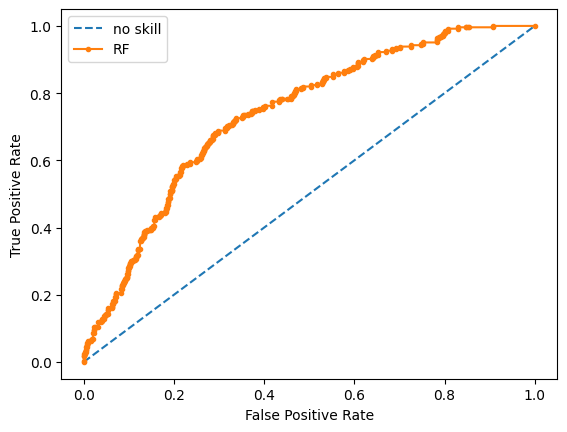

In [107]:
# plot the roc curve for the SVM model
from matplotlib import pyplot
pyplot.plot([0,1], [0,1], linestyle='--', label='no skill')
pyplot.plot(fpr, tpr, marker='.', label='RF')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [108]:
##Calculating AUC for SVM
metrics.auc(fpr, tpr)

0.7375377480586713

In [109]:
# calculate the g-mean for each threshold
from numpy import sqrt
gmeans = sqrt(tpr * (1-fpr))

In [110]:
# locate the index of the largest g-mean
from numpy import argmax
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.490352, G-Mean=0.696
